In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Problem 1 - A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [12]:
df.shape


(210, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [7]:
df.duplicated().sum()

0

<AxesSubplot:>

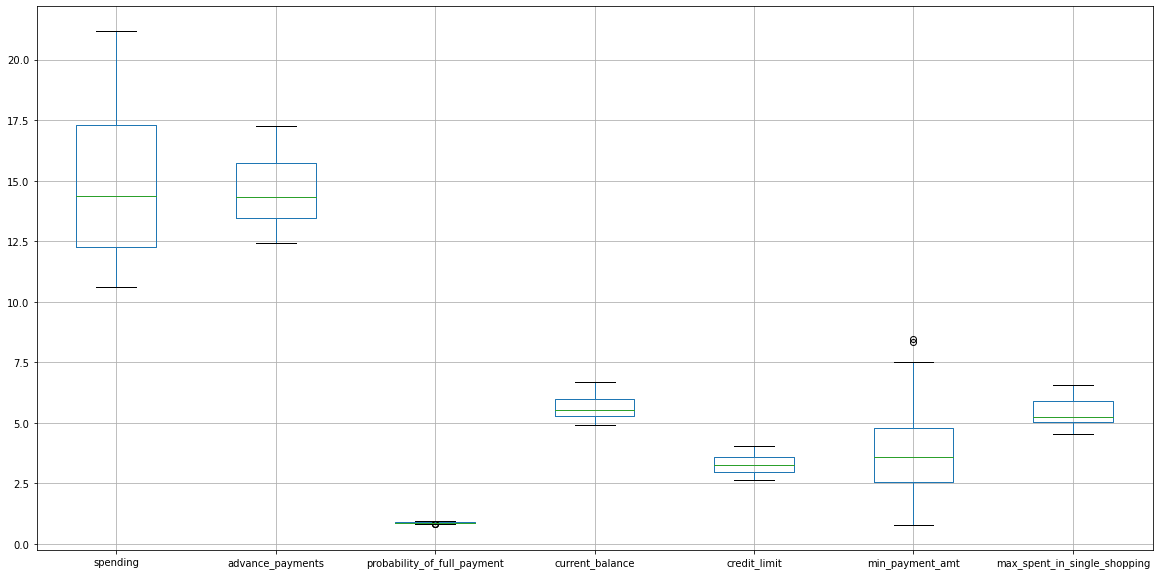

In [8]:
df.boxplot(figsize=(20,10))

In [20]:
#Removing outliers:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [9]:
lrspending,urspending=remove_outlier(df['spending'])
df['spending']=np.where(df['spending']>urspending,urspending,df['spending'])
df['spending']=np.where(df['spending']<lrspending,lrspending,df['spending'])

lradvance_payments,uradvance_payments=remove_outlier(df['advance_payments'])
df['advance_payments']=np.where(df['advance_payments']>uradvance_payments,uradvance_payments,df['advance_payments'])
df['advance_payments']=np.where(df['advance_payments']<lradvance_payments,lradvance_payments,df['advance_payments'])

lrprobability_of_full_payment,urprobability_of_full_payment=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>urprobability_of_full_payment,urprobability_of_full_payment,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lrprobability_of_full_payment,lrprobability_of_full_payment,df['probability_of_full_payment'])

lrcurrent_balance,urcurrent_balance=remove_outlier(df['current_balance'])
df['current_balance']=np.where(df['current_balance']>urcurrent_balance,urcurrent_balance,df['current_balance'])
df['current_balance']=np.where(df['current_balance']<lrcurrent_balance,lrcurrent_balance,df['current_balance'])

lrmin_payment_amt,urmin_payment_amt=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>urmin_payment_amt,urmin_payment_amt,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lrmin_payment_amt,lrmin_payment_amt,df['min_payment_amt'])


lrmax_spent_in_single_shopping ,urmax_spent_in_single_shopping =remove_outlier(df['max_spent_in_single_shopping'])
df['max_spent_in_single_shopping']=np.where(df['max_spent_in_single_shopping']>urmax_spent_in_single_shopping ,urmax_spent_in_single_shopping ,df['max_spent_in_single_shopping'])
df['max_spent_in_single_shopping']=np.where(df['max_spent_in_single_shopping']<lrmax_spent_in_single_shopping ,lrmax_spent_in_single_shopping ,df['max_spent_in_single_shopping'])


df.shape

NameError: name 'remove_outlier' is not defined

<AxesSubplot:>

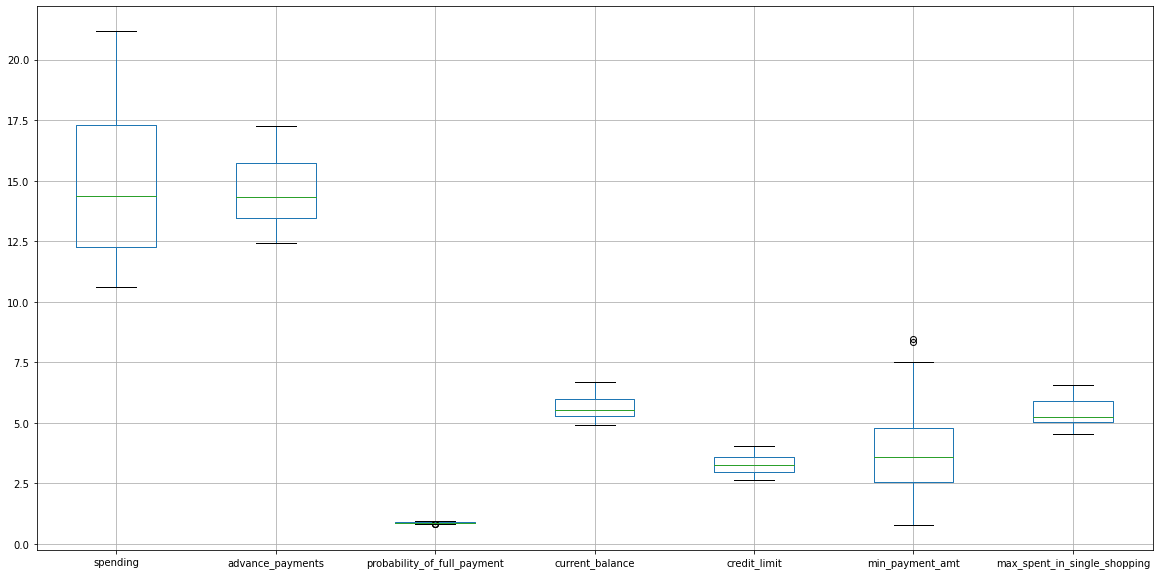

In [23]:
df.boxplot(figsize=(20,10))

<AxesSubplot:>

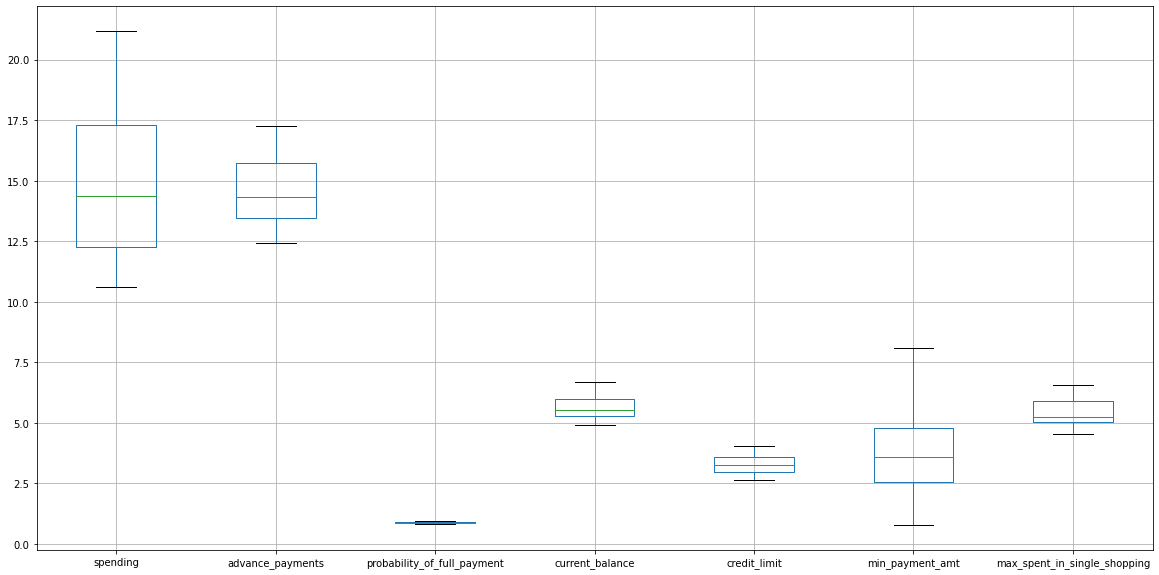

In [25]:
df.boxplot(figsize=(20,10))

In [10]:
df.skew()

spending                        0.399889
advance_payments                0.386573
probability_of_full_payment    -0.537954
current_balance                 0.525482
credit_limit                    0.134378
min_payment_amt                 0.401667
max_spent_in_single_shopping    0.561897
dtype: float64

In [ ]:
# check the box plot & Distribution of data for all features:

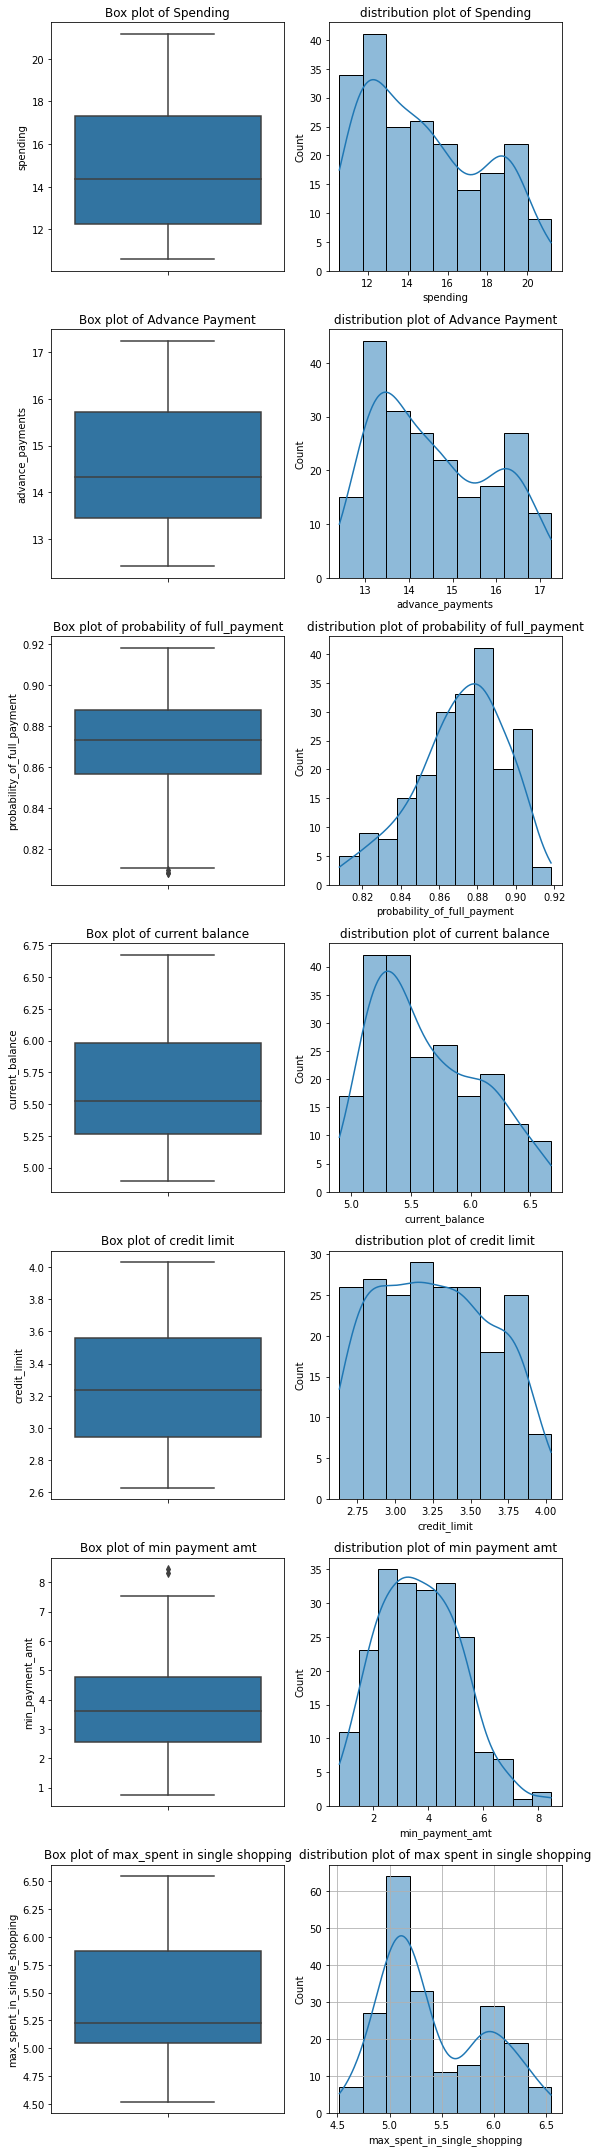

In [11]:
plt.figure(figsize=(8,30))
plt.subplot(7,2,1)
sns.boxplot(y=df['spending'], data=df)
plt.title("Box plot of Spending")
plt .subplot(7,2,2)
sns.histplot(df['spending'], kde=True)
plt.title("distribution plot of Spending")

plt.subplot(7,2,3)
sns.boxplot(y=df['advance_payments'], data=df)
plt.title("Box plot of Advance Payment")
plt .subplot(7,2,4)
sns.histplot(df['advance_payments'], kde=True)
plt.title("distribution plot of Advance Payment")

plt.subplot(7,2,5)
sns.boxplot(y=df['probability_of_full_payment'], data=df)
plt.title("Box plot of probability of full_payment")
plt .subplot(7,2,6)
sns.histplot(df['probability_of_full_payment'], kde=True)
plt.title("distribution plot of probability of full_payment")

plt.subplot(7,2,7)
sns.boxplot(y=df['current_balance'], data=df)
plt.title("Box plot of current balance")
plt .subplot(7,2,8)
sns.histplot(df['current_balance'], kde=True)
plt.title("distribution plot of current balance")

plt.subplot(7,2,9)
sns.boxplot(y=df['credit_limit'], data=df)
plt.title("Box plot of credit limit")
plt .subplot(7,2,10)
sns.histplot(df['credit_limit'], kde=True)
plt.title("distribution plot of credit limit")

plt.subplot(7,2,11)
sns.boxplot(y=df['min_payment_amt'], data=df)
plt.title("Box plot of min payment amt")
plt .subplot(7,2,12)
sns.histplot(df['min_payment_amt'], kde=True)
plt.title("distribution plot of min payment amt")

plt.subplot(7,2,13)
sns.boxplot(y=df['max_spent_in_single_shopping'], data=df)
plt.title("Box plot of max_spent in single shopping")
plt .subplot(7,2,14)
sns.histplot(df['max_spent_in_single_shopping'], kde=True)
plt.title("distribution plot of max spent in single shopping")

plt.grid()
plt.tight_layout()
plt.show()

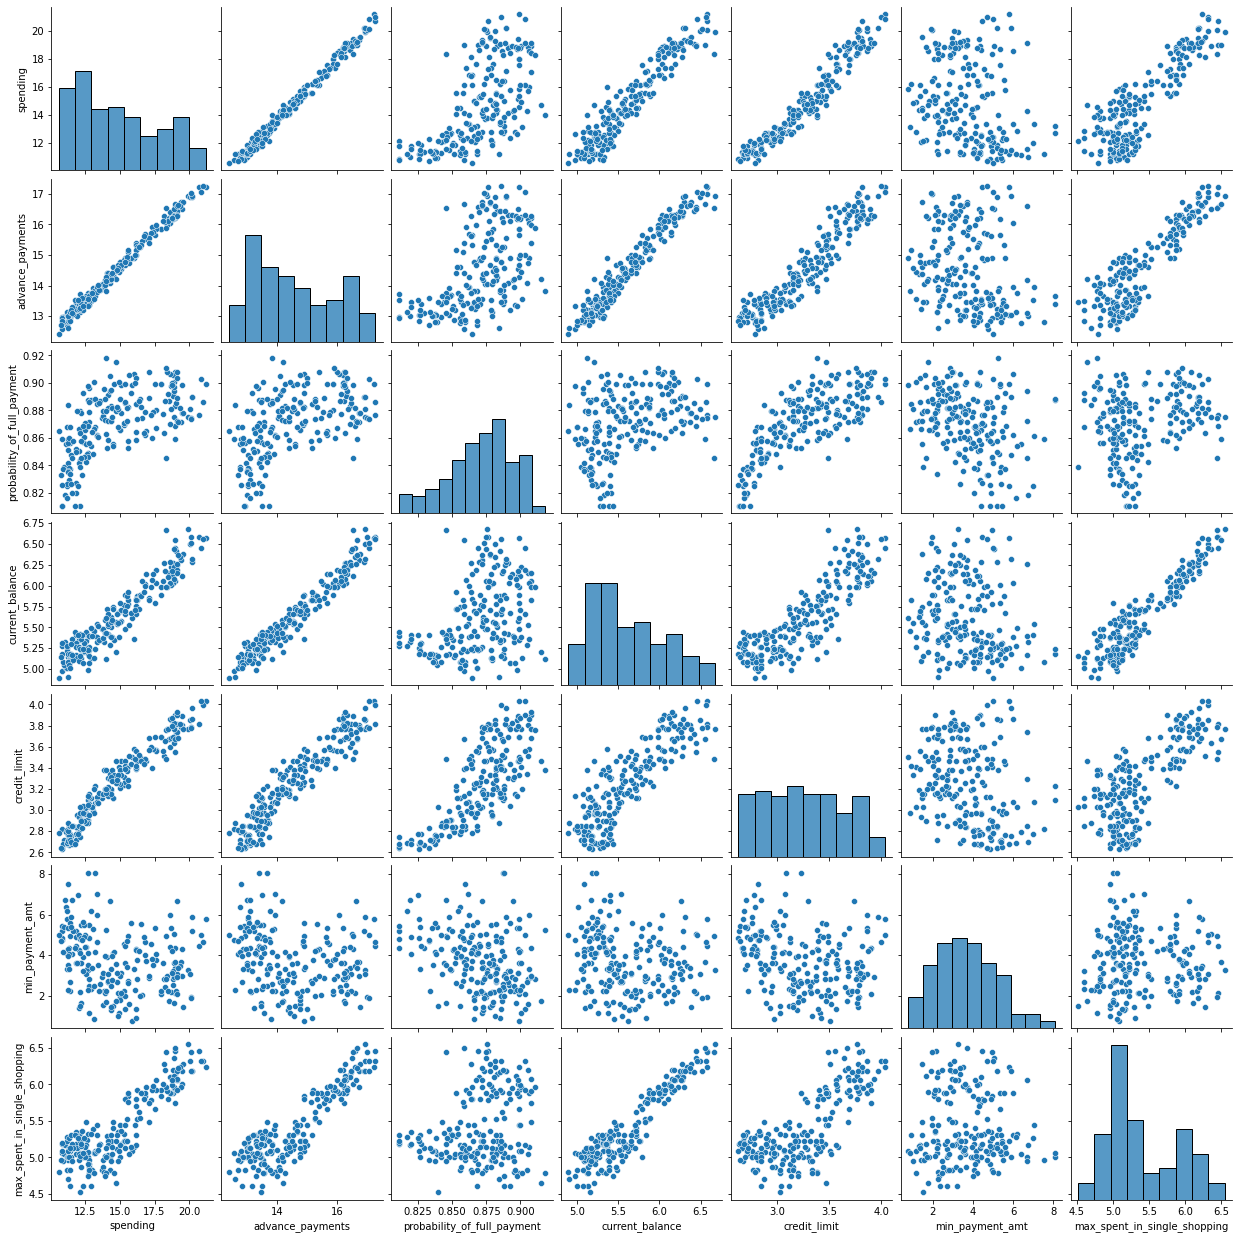

In [34]:
# Bivariate Analysis
sns.pairplot(df)
plt.show()

In [35]:
df.corr()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608900,0.949985,0.970771,-0.229619,0.863693
advance_payments,0.994341,1.000000,0.529925,0.972422,0.944829,-0.217051,0.890784
probability_of_full_payment,0.608900,0.529925,1.000000,0.368419,0.762218,-0.335071,0.227140
current_balance,0.949985,0.972422,0.368419,1.000000,0.860415,-0.170701,0.932806
credit_limit,0.970771,0.944829,0.762218,0.860415,1.000000,-0.258980,0.749131
min_payment_amt,-0.229619,-0.217051,-0.335071,-0.170701,-0.258980,1.000000,-0.009605
max_spent_in_single_shopping,0.863693,0.890784,0.227140,0.932806,0.749131,-0.009605,1.000000


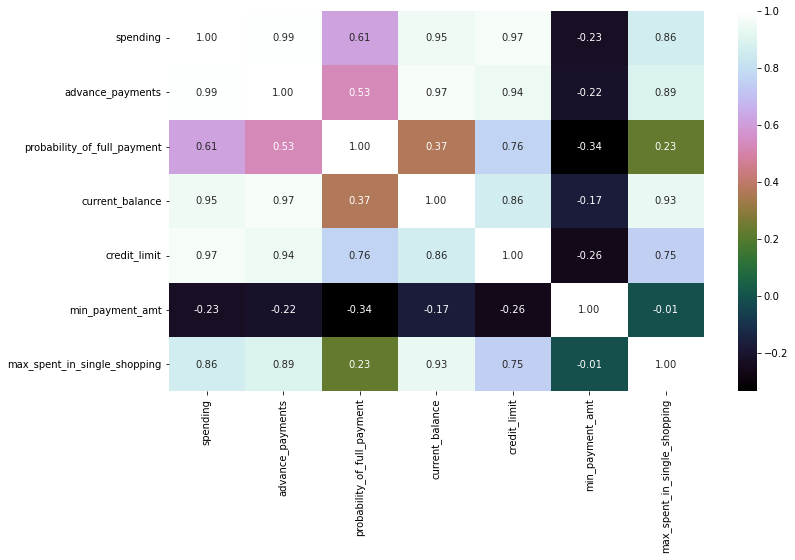

In [36]:
# Correlation Heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='cubehelix')
plt.show()

# 1.2 Do you think scaling is necessary for clustering in this case? Justify

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
x = StandardScaler()

In [39]:
scaled = x.fit_transform(df)
scaled

array([[ 1.75435461,  1.81196782,  0.177628  , ...,  1.33857863,
        -0.29862524,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.50507052, ...,  0.85823561,
        -0.24229198, -0.53858174],
       [ 1.41330028,  1.42819249,  0.505234  , ...,  1.317348  ,
        -0.22083168,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36483143, ..., -0.15287318,
        -1.32804867, -0.83023461],
       [ 0.43836719,  0.33827054,  1.23277462, ...,  0.60081421,
        -0.95718798,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77966228, ..., -0.07325831,
        -0.70905334,  0.96047321]])

In [40]:
scaled_df = pd.DataFrame(data=scaled, columns=df.columns)

In [41]:
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [42]:
scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,9.148766e-16,1.002389,-1.466714,-0.887955,-0.169674,0.846599,2.181534
advance_payments,210.0,1.097006e-16,1.002389,-1.649686,-0.851433,-0.183664,0.887069,2.065260
probability_of_full_payment,210.0,1.642601e-15,1.002389,-2.571391,-0.600968,0.103172,0.712647,2.011371
current_balance,210.0,-1.089076e-16,1.002389,-1.650501,-0.828682,-0.237628,0.794595,2.367533
credit_limit,210.0,-2.994298e-16,1.002389,-1.668209,-0.834907,-0.057335,0.804496,2.055112
min_payment_amt,210.0,1.512018e-16,1.002389,-1.966425,-0.761698,-0.065915,0.718559,2.938945
max_spent_in_single_shopping,210.0,-1.935489e-15,1.002389,-1.813288,-0.740495,-0.377459,0.956394,2.328998


# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [75]:
wardlink=linkage(scaled_df,method='ward')

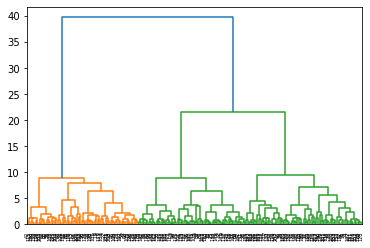

In [76]:
dend = dendrogram(wardlink)

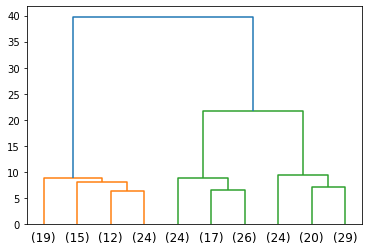

In [77]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [47]:
from scipy.cluster.hierarchy import fcluster

In [78]:
clusters_3= fcluster(wardlink,3,criterion='maxclust')
clusters_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [79]:
cluster_3_d=df.copy()

In [81]:
cluster_3_d['clusters-3'] = clusters_3

In [82]:
cluster_3_d.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,clusters-3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,1


In [83]:
cluster_3_d['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

In [84]:
aggdata_w=cluster_3_d.groupby('clusters-3').mean()
aggdata_w['Freq']=cluster_3_d['clusters-3'].value_counts().sort_index()
aggdata_w

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Freq
clusters-3,,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,1.100000,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,3.000000,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,2.260274,73


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [100]:
k_means = KMeans(n_clusters = 1)

In [101]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df)
k_means.inertia_

1470.0

In [102]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df)
k_means.inertia_

659.1474009548498

In [103]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df)
k_means.inertia_

430.2984817512229

In [104]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df)
k_means.inertia_

371.44002526957763

In [105]:
wss =[] 

In [106]:
 for i in range(1,11):
        KM = KMeans(n_clusters=i)
        KM.fit(scaled_df)
        wss.append(KM.inertia_)

In [107]:
wss

[1470.0,
 659.1474009548498,
 430.2984817512229,
 371.39265618813636,
 327.00468785295175,
 289.64792922812194,
 261.5980483109386,
 240.20826411308676,
 220.9360104997793,
 210.10317493341302]

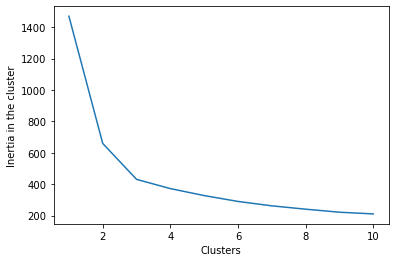

In [108]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [109]:
k_means_4 = KMeans(n_clusters = 4)
k_means_4.fit(scaled_df)
labels_4 = k_means_4.labels_

In [112]:
kmeans4_dataset=df.copy()

In [113]:
kmeans4_dataset["Clus_kmeans"] = labels_4
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,2
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,2
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,2


In [114]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [115]:
silhouette_score(scaled_df,labels_4)

0.3329971881905224

In [116]:
from sklearn import metrics

In [117]:
scores = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(scaled_df)
    scores.append(metrics.silhouette_score(scaled_df, km.labels_))
    
scores

[0.46560100442748986,
 0.4008059221522216,
 0.335108890443618,
 0.2850723187132961,
 0.2805314450903244,
 0.27059109949534516,
 0.24598532240527524,
 0.26571143361242355,
 0.2661609375790943]

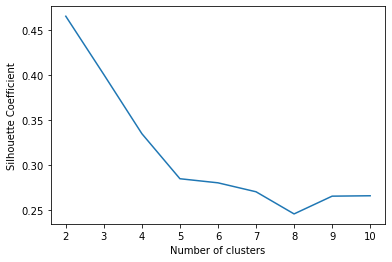

In [118]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [120]:
sil_width = silhouette_samples(scaled_df,labels_4)

In [121]:
kmeans4_dataset["sil_width"] = sil_width
kmeans4_dataset.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Clus_kmeans,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1,2,0.456586
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0,0.073920
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1,2,0.465893
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3,1,0.517404
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1,2,0.112784


In [122]:
silhouette_samples(scaled_df,labels_4).min()

-0.04252689116199231

3 Cluster Solution

In [123]:
km_3 = KMeans(n_clusters=3,random_state=123)

In [124]:
#fitting the Kmeans 
km_3.fit(scaled_df)
km_3.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 2, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [125]:
#proportion of labels classified

pd.Series(km_3.labels_).value_counts()

2    72
1    71
0    67
dtype: int64

K-Means Clustering & Cluster Information

In [131]:
kmeans1_dataset=df.copy()

In [132]:
# Fitting K-Means to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_df)



In [133]:
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

In [134]:
# New Dataframe called cluster

cluster = pd.DataFrame(y_kmeans1)

In [135]:
# Adding cluster to the Dataset1

kmeans1_dataset['cluster'] = cluster


In [136]:
#Mean of clusters

kmeans_mean_cluster = pd.DataFrame(round(kmeans1_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
cluster,,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1,2.2
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1,3.0
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0,1.1


In [137]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [138]:
ClusterPercentage(kmeans1_dataset,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [139]:
#transposing the cluster
cluster_3_T = kmeans_mean_cluster.T

In [140]:
cluster_3_T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0
clusters,2.2,3.0,1.1


# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [141]:
aggdata_w.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
clusters,1.100000,3.000000,2.260274
Freq,70.000000,67.000000,73.000000
